In [1]:
## Preliminary

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from collections import Counter
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot
import plotly.express as px
from sklearn.model_selection import train_test_split, GridSearchCV

!pip install mitosheet 
import mitosheet 

!pip install xgboost
import xgboost

%config InlineBackend.figure_format = "svg"

In [3]:
df = pd.read_csv('../datasets/train.csv')

In [4]:
# Remove irrelevant columns

In [5]:
# Deleted columns property_id
df.drop(['property_id'], axis=1, inplace=True)

# Deleted columns property_name
df.drop(['property_name'], axis=1, inplace=True)

# Deleted columns property_summary
df.drop(['property_summary'], axis=1, inplace=True)

# Deleted columns property_space
df.drop(['property_space'], axis=1, inplace=True)

# Deleted columns property_desc
df.drop(['property_desc'], axis=1, inplace=True)

# Deleted columns property_neighborhood
df.drop(['property_neighborhood'], axis=1, inplace=True)

# Deleted columns property_notes
df.drop(['property_notes'], axis=1, inplace=True)

# Deleted columns property_transit
df.drop(['property_transit'], axis=1, inplace=True)

# Deleted columns property_access
df.drop(['property_access'], axis=1, inplace=True)

# Deleted columns property_interaction
df.drop(['property_interaction'], axis=1, inplace=True)

# Deleted columns property_rules
df.drop(['property_rules'], axis=1, inplace=True)

# Deleted columns property_sqfeet
df.drop(['property_sqfeet'], axis=1, inplace=True)

# Deleted columns property_scraped_at
df.drop(['property_scraped_at'], axis=1, inplace=True)

# Deleted columns property_last_updated
df.drop(['property_last_updated'], axis=1, inplace=True)

# Deleted columns host_id
df.drop(['host_id'], axis=1, inplace=True)

# Deleted columns host_location
df.drop(['host_location'], axis=1, inplace=True)

# Deleted columns host_about
df.drop(['host_about'], axis=1, inplace=True)

# Deleted columns host_nr_listings_total
df.drop(['host_nr_listings_total'], axis=1, inplace=True)

# Deleted columns host_verified
df.drop(['host_verified'], axis=1, inplace=True)

# Deleted columns booking_max_nights
df.drop(['booking_max_nights'], axis=1, inplace=True)

# Deleted columns reviews_first
df.drop(['reviews_first'], axis=1, inplace=True)

# Deleted columns reviews_last
df.drop(['reviews_last'], axis=1, inplace=True)

In [6]:
# Transform target to logarithm (target)
df['target'] = np.log(df['target'])

In [7]:
# Remove target outliers
Q1_target = df['target'].quantile(0.25)
Q3_target = df['target'].quantile(0.75)
IQR_target = Q3_target - Q1_target

lower_bound_target = Q1_target - 1.5 * IQR_target
upper_bound_target = Q3_target + 1.5 * IQR_target

df = df[(df['target'] >= lower_bound_target) & (df['target'] <= upper_bound_target)]

In [11]:
# Check for missing values
df['property_zipcode'].isna().sum()

132

In [13]:
# Drop missing values
df.dropna(subset=['property_zipcode'], inplace=True)

0

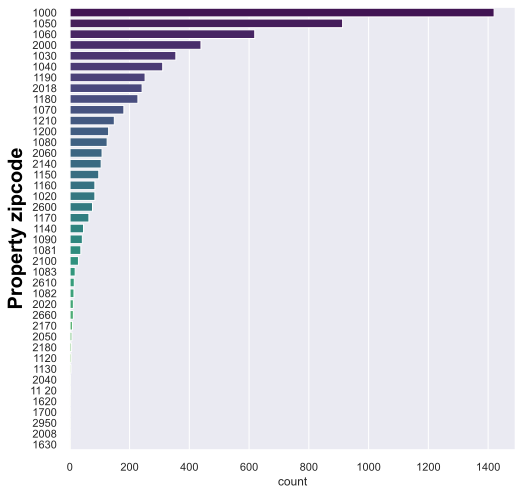

In [14]:
# Plot frequencies of each property_zipcode
sns.set(style='darkgrid')
plt.figure(figsize=(8,8))
sns.countplot(y = 'property_zipcode',data = df,order = df['property_zipcode'].value_counts().index,palette = "viridis")
plt.ylabel('Property zipcode',fontsize = 20, weight = 'bold',color='black')
#plt.axes().set(facecolor = "White")
plt.show()

In [18]:
# Check if there are significant differences in price between the zipcodes
from scipy.stats import f_oneway

zip_groups = [group['target'] for name, group in df.groupby('property_zipcode')]
f_stat, p_value = f_oneway(*zip_groups)

if p_value < 0.05:
    print("There are significant differences in target values between zip codes")
else:
    print("There are no significant differences in target values between zip codes")


There are no significant differences in target values between zip codes


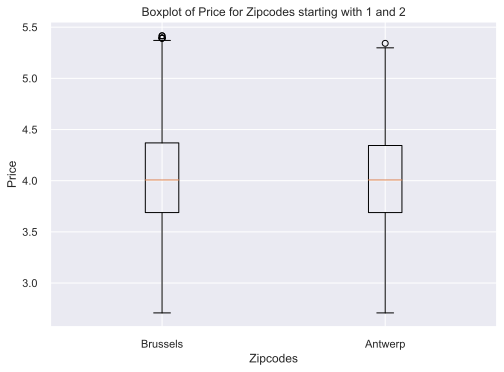

In [21]:
# Plot the distribution of prices for properties in Antwerp and Brussels

# Filter rows for zipcodes starting with '1' and '2'
zip1_df = df[df['property_zipcode'].str.startswith('1')]
zip2_df = df[df['property_zipcode'].str.startswith('2')]

# Create a list of price values for each zipcode group
zip_prices = [zip1_df['target'], zip2_df['target']]

# Create boxplot with labels for each group
plt.boxplot(zip_prices, labels=['Brussels', 'Antwerp'])

# Set title and axis labels
plt.title('Boxplot of Price for Zipcodes starting with 1 and 2')
plt.xlabel('Zipcodes')
plt.ylabel('Price')

# Show the plot
plt.show()


In [24]:
# Get a statistical description for both zipcode groups
zip1_price_desc = zip1_df['target'].describe()
zip2_price_desc = zip2_df['target'].describe()
combined_desc = pd.concat([zip1_price_desc, zip2_price_desc], axis=1)
combined_desc.columns = ['Zipcodes starting with 1', 'Zipcodes starting with 2']
print('Description of prices for both groups:\n', combined_desc)

Description of prices for both groups:
        Zipcodes starting with 1  Zipcodes starting with 2
count               5183.000000               1064.000000
mean                   4.021804                  4.013823
std                    0.514721                  0.514385
min                    2.708050                  2.708050
25%                    3.688879                  3.688879
50%                    4.007333                  4.007333
75%                    4.369448                  4.343805
max                    5.416100                  5.342334


In [26]:
# Perform t-test to check for significant differences in price between the groups
from scipy.stats import ttest_ind
t_stat, p_val = ttest_ind(zip1_df['target'], zip2_df['target'])
print('T-test result:\n', 't-statistic =', t_stat, 'p-value =', p_val)

T-test result:
 t-statistic = 0.46074105310526636 p-value = 0.6450004412544208


In [ ]:
# Because of the reasons highlighted in this EDA, we have decided to remove property_zipcode as an attribute from 
# our training set.